# Import bibliothèques

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Telechargement des données

In [2]:
data = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

In [3]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

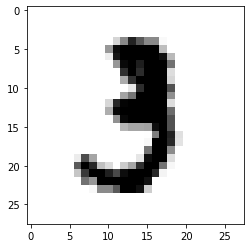

In [4]:
plt.imshow(x_train[10],cmap='binary');

# Mise en place du réseaux de neurones

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')
])


In [6]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [8]:
earlystopping = keras.callbacks.EarlyStopping(monitor='loss',patience=3)

# Entrainement du réseau de neurones

In [9]:
history = model.fit(x_train,y_train,verbose=1,epochs=50,batch_size=32,callbacks=[earlystopping])

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7812 - accuracy: 0.8201
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2737 - accuracy: 0.9293
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2108 - accuracy: 0.9455
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1828 - accuracy: 0.9546
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1568 - accuracy: 0.9615
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1368 - accuracy: 0.9664
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1217 - accuracy: 0.9695
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1169 - accuracy: 0.9721
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1049 - accuracy: 0.9751
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.096

In [10]:
prediction_confidence = model.predict(x_test)

In [11]:
prediction_confidence[0]

array([1.1766275e-35, 7.3800314e-14, 1.6548766e-16, 2.7412114e-15,
       1.4408516e-15, 4.8426865e-21, 0.0000000e+00, 1.0000000e+00,
       1.6930880e-15, 8.3568989e-14], dtype=float32)

In [12]:
prediction = list()
for pred in prediction_confidence:
    prediction.append(np.argmax(pred))
prediction = np.array(prediction)

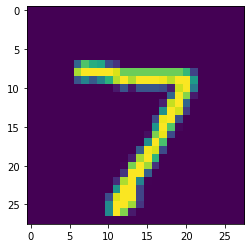

In [13]:
plt.imshow(x_test[0])
plt.show()

In [14]:
prediction[0]

7

# Evaluation du modèle

In [15]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
np.unique([prediction == y_test],return_counts=True)

(array([False,  True]), array([ 302, 9698], dtype=int64))

In [18]:
# Evaluasi error metrics model
def getaccuracy(y_true,y_pred):
    prediction_accuracy = [y_true == y_pred]
    accuracy_metric = np.unique(prediction_accuracy,return_counts=True)
    print(f'Predictions correctes : {accuracy_metric[1][1]}')
    print(f'Predictions fausses : {accuracy_metric[1][0]}')
    print(f'Precision : {accuracy_metric[1][1] / (accuracy_metric[1][0] + accuracy_metric[1][1]) * 100}')

In [19]:
getaccuracy(y_test,prediction)

Predictions correctes : 9698
Predictions fausses : 302
Precision : 96.98


# Visualisation 

In [20]:
import random

In [21]:
prediction_confidence.shape

(10000, 10)

In [22]:
def visualiser(pred_conf,count):
    for i in range(count):
        index = random.choice(range(10000))
        fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(6,3))
        axes[0].imshow(x_test[index],cmap='binary')
        axes[0].set_title('Actual')
        axes[0].axis(False)

        axes[1].grid(True)
        axes[1].bar(range(10),pred_conf[index]*100)
        axes[1].set_title('Prediction With Confidence Level')
        axes[1].set_xticks(range(10))
        axes[1].set_yticks(range(0,110,10))

        plt.tight_layout()
        plt.show()

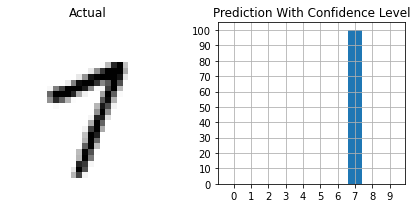

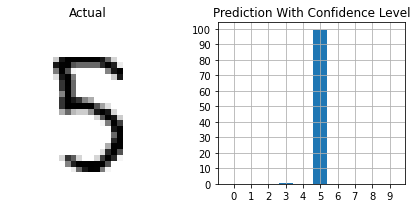

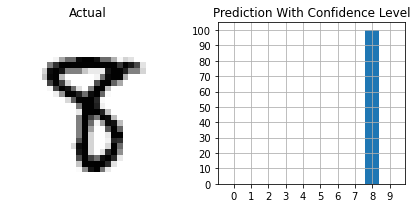

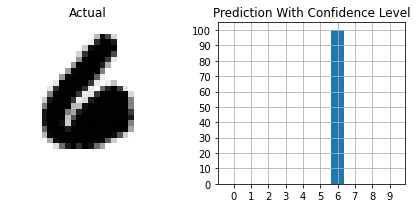

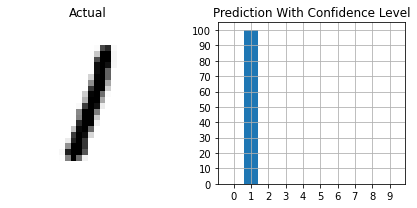

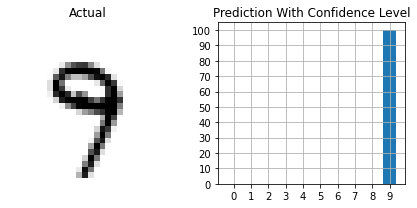

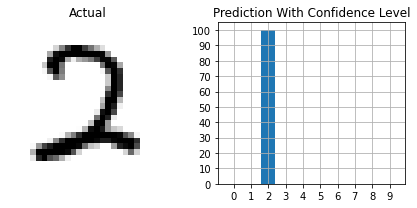

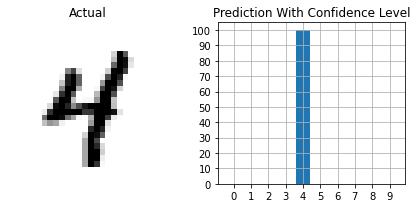

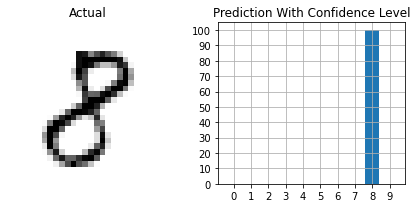

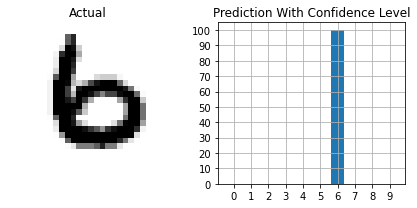

In [23]:
visualiser(prediction_confidence,10)

# Sauvegarde du  modèle

In [24]:
model.save('ai.h5')